<a href="https://colab.research.google.com/github/RAMkong/Pytorchpractice/blob/main/workflow_exerxise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [4]:
weight = 0.3
bias = 0.9

X=torch.arange(0,1,0.01).unsqueeze(dim=1)

Y=weight*X+bias


In [5]:
train_split= int(len(X)*0.8)
X_train,Y_train=X[:train_split],Y[:train_split]
X_test,Y_test=X[train_split:],Y[train_split:]

len(X_train),len(X_test)

(80, 20)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=None):

  plt.figure(figsize=(10, 7))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 5});



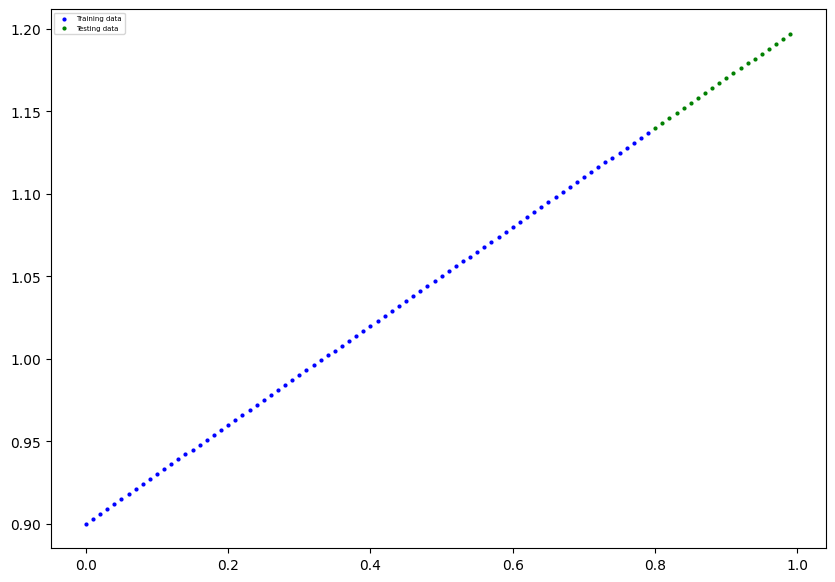

In [7]:
plot_predictions();


In [9]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(69)
model = LinearRegressionModel()
model, model.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.6796]])),
              ('linear_layer.bias', tensor([0.6083]))]))

In [10]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [13]:
torch.manual_seed(69)

epochs = 1000

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, Y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, Y_test)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 100 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 200 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 300 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 400 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 500 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 600 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 700 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 800 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487
Epoch: 900 | Train loss: 0.005910050123929977 | Test loss: 0.0036909044720232487


In [14]:
from pprint import pprint
print("The model learned the following values for weights and bias:")
pprint(model.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.3079]])),
             ('linear_layer.bias', tensor([0.9028]))])

And the original values for weights and bias are:
weights: 0.3, bias: 0.9


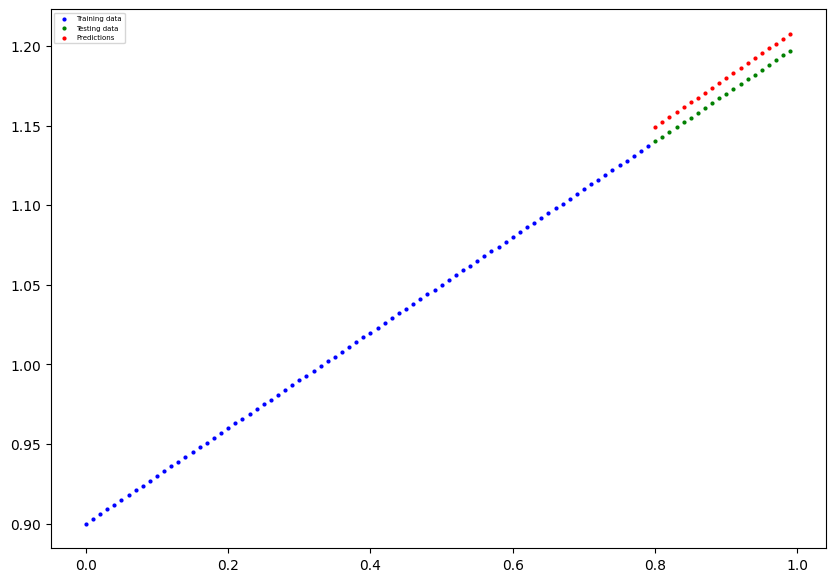

In [19]:
model.eval()

with torch.inference_mode():
    y_preds = model(X_test)
plot_predictions(predictions=y_preds.cpu())
